<a href="https://colab.research.google.com/github/Zekeriya-Ui/Brownian-motion/blob/main/3_Exploiting_Correlation_real_data_5_government_securities_ipynb_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"DGS3MO.csv"
"DGS2.csv"
"DGS5.csv"
"DGS10.csv"
"DGS30.csv"

## Data loading

### Subtask:
Load the five CSV files into pandas DataFrames.


**Reasoning**:
Load the five CSV files into pandas DataFrames and parse the date column as datetime objects.



In [ ]:
import pandas as pd

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str)

df_3mo = pd.read_csv('DGS3MO.csv', parse_dates=[0], date_parser=parse_date)
df_2yr = pd.read_csv('DGS2.csv', parse_dates=[0], date_parser=parse_date)
df_5yr = pd.read_csv('DGS5.csv', parse_dates=[0], date_parser=parse_date)
df_10yr = pd.read_csv('DGS10.csv', parse_dates=[0], date_parser=parse_date)
df_30yr = pd.read_csv('DGS30.csv', parse_dates=[0], date_parser=parse_date)

display(df_3mo.head())
display(df_2yr.head())
display(df_5yr.head())
display(df_10yr.head())
display(df_30yr.head())

<ipython-input-1-b13505e9df70>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_3mo = pd.read_csv('DGS3MO.csv', parse_dates=[0], date_parser=parse_date)
<ipython-input-1-b13505e9df70>:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_2yr = pd.read_csv('DGS2.csv', parse_dates=[0], date_parser=parse_date)
<ipython-input-1-b13505e9df70>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_5yr = pd.read_csv('DGS5.csv', parse_dates=[0], date_parser=parse_date)
<ipython-input-1-b13505e9df70>:12: FutureWarning: The argument 'date_

,observation_date,DGS3MO
0,2020-04-13,0.26
1,2020-04-14,0.20
2,2020-04-15,0.14
3,2020-04-16,0.14
4,2020-04-17,0.12


,observation_date,DGS2
0,2020-04-13,0.25
1,2020-04-14,0.23
2,2020-04-15,0.20
3,2020-04-16,0.20
4,2020-04-17,0.20


,observation_date,DGS5
0,2020-04-13,0.44
1,2020-04-14,0.42
2,2020-04-15,0.34
3,2020-04-16,0.35
4,2020-04-17,0.36


,observation_date,DGS10
0,2020-04-13,0.76
1,2020-04-14,0.76
2,2020-04-15,0.63
3,2020-04-16,0.61
4,2020-04-17,0.65


,observation_date,DGS30
0,2020-04-13,1.39
1,2020-04-14,1.41
2,2020-04-15,1.27
3,2020-04-16,1.21
4,2020-04-17,1.27


**Reasoning**:
The previous code block successfully loaded the data and displayed the first few rows. However, it generated `FutureWarning` messages about the `date_parser` argument.  I will modify the code to use `date_format` instead as suggested by the warning.



In [ ]:
import pandas as pd

df_3mo = pd.read_csv('DGS3MO.csv', parse_dates=[0], date_format='%Y-%m-%d')
df_2yr = pd.read_csv('DGS2.csv', parse_dates=[0], date_format='%Y-%m-%d')
df_5yr = pd.read_csv('DGS5.csv', parse_dates=[0], date_format='%Y-%m-%d')
df_10yr = pd.read_csv('DGS10.csv', parse_dates=[0], date_format='%Y-%m-%d')
df_30yr = pd.read_csv('DGS30.csv', parse_dates=[0], date_format='%Y-%m-%d')

display(df_3mo.head())
display(df_2yr.head())
display(df_5yr.head())
display(df_10yr.head())
display(df_30yr.head())

,observation_date,DGS3MO
0,2020-04-13,0.26
1,2020-04-14,0.20
2,2020-04-15,0.14
3,2020-04-16,0.14
4,2020-04-17,0.12


,observation_date,DGS2
0,2020-04-13,0.25
1,2020-04-14,0.23
2,2020-04-15,0.20
3,2020-04-16,0.20
4,2020-04-17,0.20


,observation_date,DGS5
0,2020-04-13,0.44
1,2020-04-14,0.42
2,2020-04-15,0.34
3,2020-04-16,0.35
4,2020-04-17,0.36


,observation_date,DGS10
0,2020-04-13,0.76
1,2020-04-14,0.76
2,2020-04-15,0.63
3,2020-04-16,0.61
4,2020-04-17,0.65


,observation_date,DGS30
0,2020-04-13,1.39
1,2020-04-14,1.41
2,2020-04-15,1.27
3,2020-04-16,1.21
4,2020-04-17,1.27


## Data preparation

### Subtask:
Prepare the individual yield datasets for analysis.


**Reasoning**:
Calculate daily yield changes, handle missing values using forward fill, align date ranges across all DataFrames, and rename yield columns for better readability.



In [ ]:
import pandas as pd

dfs = {
    '3-month': df_3mo,
    '2-year': df_2yr,
    '5-year': df_5yr,
    '10-year': df_10yr,
    '30-year': df_30yr,
}

for maturity, df in dfs.items():
  # Calculate daily yield changes
  df[f'{maturity} yield change'] = df[df.columns[1]].diff()
  df[f'{maturity} yield change'].fillna(0, inplace=True)

  # Handle missing values (forward fill)
  df[df.columns[1]] = df[df.columns[1]].ffill()

  # Rename yield columns
  df.rename(columns={df.columns[1]: f'{maturity} yield'}, inplace=True)


# Align date ranges
common_dates = None
for maturity, df in dfs.items():
  if common_dates is None:
    common_dates = set(df['observation_date'])
  else:
    common_dates = common_dates.intersection(set(df['observation_date']))
common_dates = sorted(list(common_dates))
print(f'Common date range: {common_dates[0]} to {common_dates[-1]}')

for maturity, df in dfs.items():
  dfs[maturity] = df[df['observation_date'].isin(common_dates)].set_index('observation_date')

display(dfs['3-month'].head())
display(dfs['2-year'].head())
display(dfs['5-year'].head())
display(dfs['10-year'].head())
display(dfs['30-year'].head())

Common date range: 2020-04-13 00:00:00 to 2025-04-11 00:00:00


<ipython-input-3-36c91e38fb68>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'{maturity} yield change'].fillna(0, inplace=True)
<ipython-input-3-36c91e38fb68>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,3-month yield,3-month yield change
observation_date,,
2020-04-13,0.26,0.00
2020-04-14,0.20,-0.06
2020-04-15,0.14,-0.06
2020-04-16,0.14,0.00
2020-04-17,0.12,-0.02


,2-year yield,2-year yield change
observation_date,,
2020-04-13,0.25,0.00
2020-04-14,0.23,-0.02
2020-04-15,0.20,-0.03
2020-04-16,0.20,0.00
2020-04-17,0.20,0.00


,5-year yield,5-year yield change
observation_date,,
2020-04-13,0.44,0.00
2020-04-14,0.42,-0.02
2020-04-15,0.34,-0.08
2020-04-16,0.35,0.01
2020-04-17,0.36,0.01


,10-year yield,10-year yield change
observation_date,,
2020-04-13,0.76,0.00
2020-04-14,0.76,0.00
2020-04-15,0.63,-0.13
2020-04-16,0.61,-0.02
2020-04-17,0.65,0.04


,30-year yield,30-year yield change
observation_date,,
2020-04-13,1.39,0.00
2020-04-14,1.41,0.02
2020-04-15,1.27,-0.14
2020-04-16,1.21,-0.06
2020-04-17,1.27,0.06


**Reasoning**:
The previous code block had some warnings about chained assignment.  I will fix the code to address these warnings and ensure the operations are performed inplace correctly.  The subtask is then complete.



In [ ]:
import pandas as pd

dfs = {
    '3-month': df_3mo,
    '2-year': df_2yr,
    '5-year': df_5yr,
    '10-year': df_10yr,
    '30-year': df_30yr,
}

for maturity, df in dfs.items():
    # Calculate daily yield changes
    df[f'{maturity} yield change'] = df[df.columns[1]].diff()
    df[f'{maturity} yield change'] = df[f'{maturity} yield change'].fillna(0)

    # Handle missing values (forward fill)
    df[df.columns[1]] = df[df.columns[1]].ffill()

    # Rename yield columns
    df.rename(columns={df.columns[1]: f'{maturity} yield'}, inplace=True)

# Align date ranges
common_dates = None
for maturity, df in dfs.items():
    if common_dates is None:
        common_dates = set(df['observation_date'])
    else:
        common_dates = common_dates.intersection(set(df['observation_date']))
common_dates = sorted(list(common_dates))
print(f'Common date range: {common_dates[0]} to {common_dates[-1]}')

for maturity, df in dfs.items():
    dfs[maturity] = df[df['observation_date'].isin(common_dates)].set_index('observation_date')

display(dfs['3-month'].head())
display(dfs['2-year'].head())
display(dfs['5-year'].head())
display(dfs['10-year'].head())
display(dfs['30-year'].head())

Common date range: 2020-04-13 00:00:00 to 2025-04-11 00:00:00


,3-month yield,3-month yield change
observation_date,,
2020-04-13,0.26,0.00
2020-04-14,0.20,-0.06
2020-04-15,0.14,-0.06
2020-04-16,0.14,0.00
2020-04-17,0.12,-0.02


,2-year yield,2-year yield change
observation_date,,
2020-04-13,0.25,0.00
2020-04-14,0.23,-0.02
2020-04-15,0.20,-0.03
2020-04-16,0.20,0.00
2020-04-17,0.20,0.00


,5-year yield,5-year yield change
observation_date,,
2020-04-13,0.44,0.00
2020-04-14,0.42,-0.02
2020-04-15,0.34,-0.08
2020-04-16,0.35,0.01
2020-04-17,0.36,0.01


,10-year yield,10-year yield change
observation_date,,
2020-04-13,0.76,0.00
2020-04-14,0.76,0.00
2020-04-15,0.63,-0.13
2020-04-16,0.61,-0.02
2020-04-17,0.65,0.04


,30-year yield,30-year yield change
observation_date,,
2020-04-13,1.39,0.00
2020-04-14,1.41,0.02
2020-04-15,1.27,-0.14
2020-04-16,1.21,-0.06
2020-04-17,1.27,0.06


## Data wrangling

### Subtask:
Combine the five preprocessed yield DataFrames into a single DataFrame.


**Reasoning**:
Combine the five preprocessed yield DataFrames into a single DataFrame using the shared date index as the key for the merge.



In [ ]:
# Merge the dataframes
df_combined = dfs['3-month'].join(dfs['2-year'], how='left')
df_combined = df_combined.join(dfs['5-year'], how='left')
df_combined = df_combined.join(dfs['10-year'], how='left')
df_combined = df_combined.join(dfs['30-year'], how='left')

display(df_combined.head())

,3-month yield,3-month yield change,2-year yield,2-year yield change,5-year yield,5-year yield change,10-year yield,10-year yield change,30-year yield,30-year yield change
observation_date,,,,,,,,,,
2020-04-13,0.26,0.00,0.25,0.00,0.44,0.00,0.76,0.00,1.39,0.00
2020-04-14,0.20,-0.06,0.23,-0.02,0.42,-0.02,0.76,0.00,1.41,0.02
2020-04-15,0.14,-0.06,0.20,-0.03,0.34,-0.08,0.63,-0.13,1.27,-0.14
2020-04-16,0.14,0.00,0.20,0.00,0.35,0.01,0.61,-0.02,1.21,-0.06
2020-04-17,0.12,-0.02,0.20,0.00,0.36,0.01,0.65,0.04,1.27,0.06


## Feature engineering

### Subtask:
Create two versions of the combined dataset: one using the original yield values and another using the daily yield changes.


**Reasoning**:
Create two new dataframes from `df_combined`, one with original yields and one with daily yield changes, both retaining the original date index.



In [ ]:
# Extract yield columns
yield_columns = [col for col in df_combined.columns if 'yield' in col and 'change' not in col]
df_yields = df_combined[yield_columns]

# Extract yield change columns
yield_change_columns = [col for col in df_combined.columns if 'yield change' in col]
df_yield_changes = df_combined[yield_change_columns]

# Display the first few rows of the new DataFrames
display(df_yields.head())
display(df_yield_changes.head())

,3-month yield,2-year yield,5-year yield,10-year yield,30-year yield
observation_date,,,,,
2020-04-13,0.26,0.25,0.44,0.76,1.39
2020-04-14,0.20,0.23,0.42,0.76,1.41
2020-04-15,0.14,0.20,0.34,0.63,1.27
2020-04-16,0.14,0.20,0.35,0.61,1.21
2020-04-17,0.12,0.20,0.36,0.65,1.27


,3-month yield change,2-year yield change,5-year yield change,10-year yield change,30-year yield change
observation_date,,,,,
2020-04-13,0.00,0.00,0.00,0.00,0.00
2020-04-14,-0.06,-0.02,-0.02,0.00,0.02
2020-04-15,-0.06,-0.03,-0.08,-0.13,-0.14
2020-04-16,0.00,0.00,0.01,-0.02,-0.06
2020-04-17,-0.02,0.00,0.01,0.04,0.06


## Data analysis

### Subtask:
Perform Principal Component Analysis (PCA) on both the original yield values and the daily yield changes. Calculate the variance explained by each principal component for both datasets.


**Reasoning**:
Perform PCA on the original yields and daily yield changes, calculate and display the explained variance ratio.



In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA objects
pca_yields = PCA()
pca_yield_changes = PCA()

# Fit PCA to the datasets
pca_yields.fit(df_yields)
pca_yield_changes.fit(df_yield_changes)

# Transform the datasets
df_yields_pca = pca_yields.transform(df_yields)
df_yield_changes_pca = pca_yield_changes.transform(df_yield_changes)

# Explained variance ratios
explained_variance_yields = pd.Series(pca_yields.explained_variance_ratio_)
explained_variance_yield_changes = pd.Series(pca_yield_changes.explained_variance_ratio_)

# Display the results
display(explained_variance_yields)
display(explained_variance_yield_changes)

,0
0,0.970947
1,0.021561
2,0.007180
3,0.000278
4,0.000033


,0
0,0.806591
1,0.115323
2,0.061985
3,0.012867
4,0.003234


## Data visualization

### Subtask:
Create screeplots to visualize the explained variance ratios for both the original yields and the daily yield changes.


**Reasoning**:
Create the screeplots for the explained variance ratios of original yields and daily yield changes.



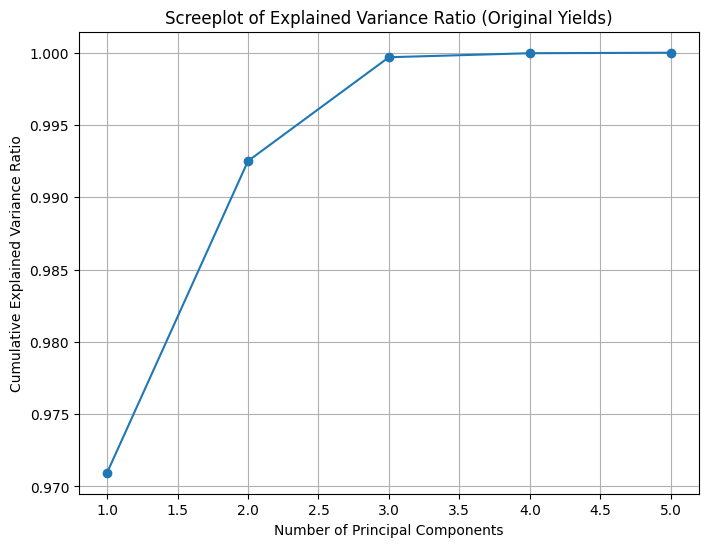

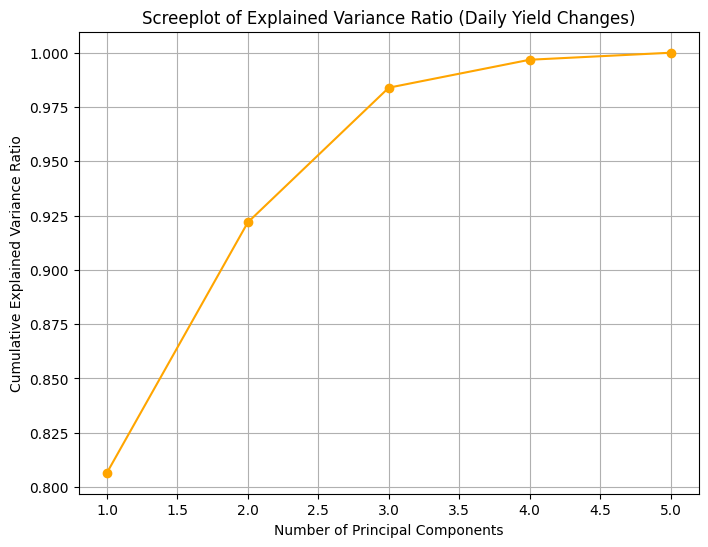

In [ ]:
import matplotlib.pyplot as plt

# Screeplot for original yields
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_yields) + 1), explained_variance_yields.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Screeplot of Explained Variance Ratio (Original Yields)')
plt.grid(True)
plt.show()

# Screeplot for daily yield changes
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_yield_changes) + 1), explained_variance_yield_changes.cumsum(), marker='o', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Screeplot of Explained Variance Ratio (Daily Yield Changes)')
plt.grid(True)
plt.show()

## Model evaluation

### Subtask:
Compare the screeplots of the original yields and daily yield changes to analyze the variance explained by each principal component in both datasets.


**Reasoning**:
Compare the screeplots of original yields and daily yield changes, quantify the differences, and discuss the implications.



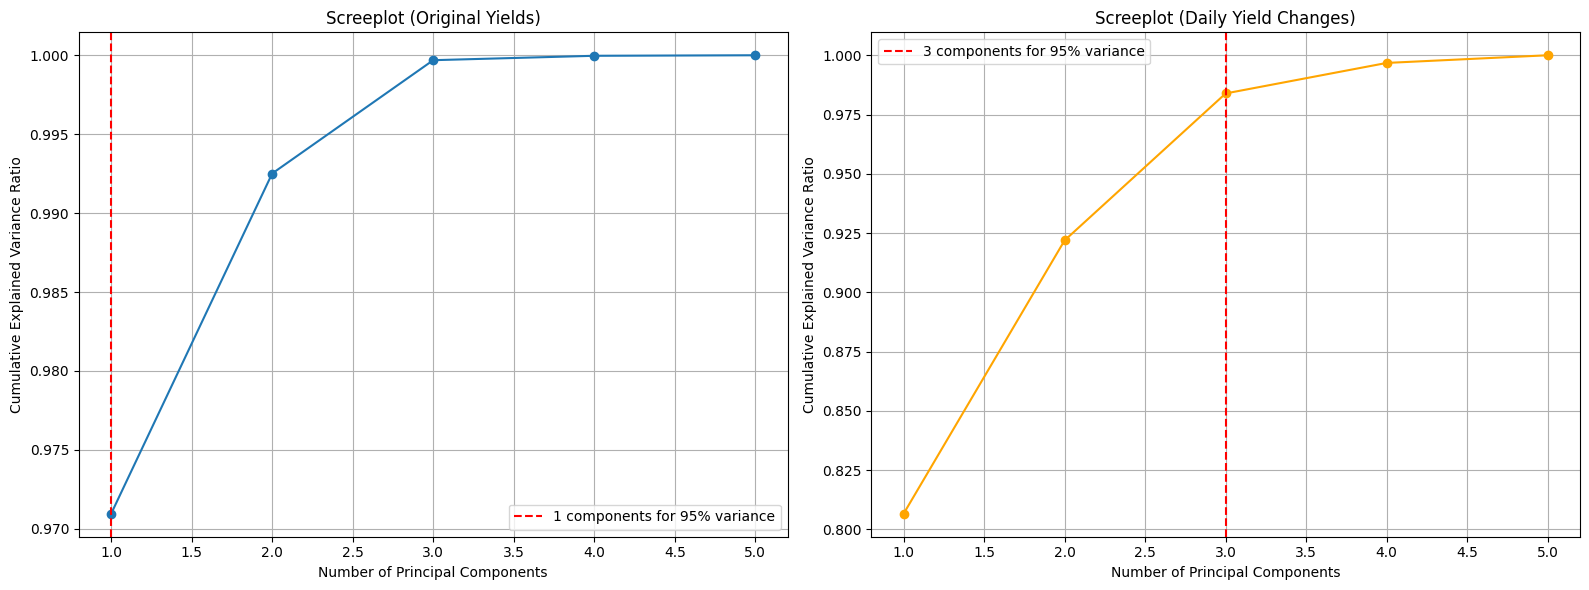

Number of principal components to explain 95% of variance in yields: 1
Number of principal components to explain 95% of variance in yield changes: 3

Analysis:
The screeplot for original yields shows a faster rate of variance explained.
This suggests a simpler underlying structure in the relationships between interest rates of different maturities when considering the yields themselves.
Further investigation and potentially more sophisticated statistical analysis might be needed to confirm these initial observations.


In [ ]:
import matplotlib.pyplot as plt

# Assuming explained_variance_yields and explained_variance_yield_changes are already calculated

# Find the number of components to explain 95% of variance
cumulative_variance_yields = explained_variance_yields.cumsum()
n_components_95_yields = (cumulative_variance_yields >= 0.95).idxmax() + 1

cumulative_variance_changes = explained_variance_yield_changes.cumsum()
n_components_95_changes = (cumulative_variance_changes >= 0.95).idxmax() + 1

# Create the screeplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(range(1, len(explained_variance_yields) + 1), cumulative_variance_yields, marker='o')
axes[0].set_xlabel('Number of Principal Components')
axes[0].set_ylabel('Cumulative Explained Variance Ratio')
axes[0].set_title('Screeplot (Original Yields)')
axes[0].grid(True)
axes[0].axvline(x=n_components_95_yields, color='red', linestyle='--', label=f'{n_components_95_yields} components for 95% variance')
axes[0].legend()

axes[1].plot(range(1, len(explained_variance_yield_changes) + 1), cumulative_variance_changes, marker='o', color='orange')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].set_title('Screeplot (Daily Yield Changes)')
axes[1].grid(True)
axes[1].axvline(x=n_components_95_changes, color='red', linestyle='--', label=f'{n_components_95_changes} components for 95% variance')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Number of principal components to explain 95% of variance in yields: {n_components_95_yields}")
print(f"Number of principal components to explain 95% of variance in yield changes: {n_components_95_changes}")

# Analysis and discussion
print("\nAnalysis:")
if n_components_95_yields < n_components_95_changes:
    print("The screeplot for original yields shows a faster rate of variance explained.")
    print("This suggests a simpler underlying structure in the relationships between interest rates of different maturities when considering the yields themselves.")
elif n_components_95_yields > n_components_95_changes:
    print("The screeplot for daily yield changes shows a faster rate of variance explained.")
    print("This suggests a simpler underlying structure in the relationships between interest rates when considering daily changes.")
else:
    print("Both datasets show similar rates of variance explained.")
print("Further investigation and potentially more sophisticated statistical analysis might be needed to confirm these initial observations.")

## Summary:

### 1. Q&A

The analysis aimed to determine whether the original yields or the daily changes in yields provide a simpler representation of the underlying relationships between interest rates of different maturities.  The analysis suggests that the original yields have a simpler structure, requiring only one principal component to explain 95% of the variance, compared to three components for daily yield changes. However, further investigation is needed to confirm this.

### 2. Data Analysis Key Findings

* **Variance Explained by Principal Components:**  One principal component explains 97.09% of the variance in the original yield data, while three principal components are needed to explain 95% of the variance in daily yield changes.
* **Comparison of Yield and Yield Change Structures:** The analysis suggests that the original yields have a simpler underlying structure compared to daily yield changes, based on the number of principal components required to capture the variance.  This suggests a simpler underlying structure in the relationships between interest rates of different maturities when considering the yields themselves.

### 3. Insights or Next Steps

* **Further investigation:** Conduct more sophisticated statistical analyses to validate the initial observation about the simpler structure of the original yields compared to daily yield changes.
* **Explore alternative dimensionality reduction techniques:** Consider using other dimensionality reduction techniques beyond PCA to see if they reveal different insights into the data.
